### Entrenamiento del modelo

### cargar datos codificado en ordinal sample_150K_cod y Sample_1M_cod

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers

import pandas as pd

#df_150K=pd.read_csv("dataset/data/sample_150K_cod.csv")
#df=pd.read_csv("../dataset/data/sample_1M.csv")
#df= pd.read_csv("../dataset/data/sample_7M_ordinal.csv")
df= pd.read_csv("../dataset/data/sample_3M_cod.csv")

In [4]:
y = df.AttackCod   #TENGO QUE ELIMINAR ESTA COLUMNA!

In [ ]:
tipos_ataques = df['Attack_ordinal'].unique()
print(tipos_ataques)

print('Tipos de ataques: '+ str(len(tipos_ataques)))

#  cuántas veces aparece cada tipo de ataque en el dataset`
conteo_ataques = df['Attack_ordinal'].value_counts()
print(conteo_ataques)

In [4]:
df.columns
#df.info()

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Dataset',
       'AttackCod'],
      dtype='object')

### cargar datos codificado en ordinal sample_1M_cod_OH

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#df_150K=pd.read_csv("dataset/data/sample_150K_cod.csv")
df_1MOH=pd.read_csv("../dataset/data/sample_1M_OH.csv")

In [30]:
df_1MOH.columns
df_1MOH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519271 entries, 0 to 1519270
Data columns (total 46 columns):
 #   Column                       Non-Null Count    Dtype
---  ------                       --------------    -----
 0   L4_SRC_PORT                  1519271 non-null  int64
 1   L4_DST_PORT                  1519271 non-null  int64
 2   PROTOCOL                     1519271 non-null  int64
 3   L7_PROTO                     1519271 non-null  int64
 4   IN_BYTES                     1519271 non-null  int64
 5   IN_PKTS                      1519271 non-null  int64
 6   OUT_BYTES                    1519271 non-null  int64
 7   OUT_PKTS                     1519271 non-null  int64
 8   TCP_FLAGS                    1519271 non-null  int64
 9   CLIENT_TCP_FLAGS             1519271 non-null  int64
 10  SERVER_TCP_FLAGS             1519271 non-null  int64
 11  FLOW_DURATION_MILLISECONDS   1519271 non-null  int64
 12  DURATION_IN                  1519271 non-null  int64
 13  DURATION_OUT

### Seleccion y normalizacion de caracteristicas

In [9]:
# Asumiendo que ya has cargado tu DataFrame como df
y = df_1MOH[['DDoS', 'No_DDoS', 'Benign']]
y.columns
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519271 entries, 0 to 1519270
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   DDoS     1519271 non-null  bool 
 1   No_DDoS  1519271 non-null  bool 
 2   Benign   1519271 non-null  bool 
dtypes: bool(3)
memory usage: 4.3 MB


In [5]:
''' Caracteristicas con tecnicas de seleccion MIc 15 caracteristicas
NIDS_features = ['MAX_IP_PKT_LEN','IN_BYTES','L7_PROTO','MIN_TTL','DURATION_IN','L4_DST_PORT','DST_TO_SRC_AVG_THROUGHPUT','IN_PKTS','MIN_IP_PKT_LEN','L4_SRC_PORT','RETRANSMITTED_IN_BYTES','DNS_QUERY_TYPE','NUM_PKTS_1024_TO_1514_BYTES', 
'RETRANSMITTED_OUT_BYTES', 'FTP_COMMAND_RET_CODE']

'''
#Caracteristicas con tecnicas de seleccion RFE 20 caracteristicas
NIDS_features = ['L4_SRC_PORT','L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN']

'''
NIDS_features =['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 
                'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 
                'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 
                'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 
                'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 
                'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
                'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE',
                'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE']
'''
X = df[NIDS_features]
#X = df_1MOH[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# tomamos las caracteristicas escaladas y las convertimso nuevamente a un dataframe
X = pd.DataFrame(X_sc, columns=NIDS_features)

X.info()
X.head()
print(len(NIDS_features))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 20 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   L4_SRC_PORT                 float64
 1   L4_DST_PORT                 float64
 2   L7_PROTO                    float64
 3   IN_BYTES                    float64
 4   OUT_BYTES                   float64
 5   TCP_FLAGS                   float64
 6   CLIENT_TCP_FLAGS            float64
 7   FLOW_DURATION_MILLISECONDS  float64
 8   DURATION_IN                 float64
 9   MIN_TTL                     float64
 10  MAX_TTL                     float64
 11  LONGEST_FLOW_PKT            float64
 12  SHORTEST_FLOW_PKT           float64
 13  MAX_IP_PKT_LEN              float64
 14  SRC_TO_DST_SECOND_BYTES     float64
 15  DST_TO_SRC_SECOND_BYTES     float64
 16  SRC_TO_DST_AVG_THROUGHPUT   float64
 17  DST_TO_SRC_AVG_THROUGHPUT   float64
 18  NUM_PKTS_UP_TO_128_BYTES    float64
 19  TCP_WIN_MAX_IN       

In [13]:
''' Caracteristicas con tecnicas de seleccion MI
NIDS_features = ['MAX_IP_PKT_LEN','IN_BYTES','L7_PROTO','MIN_TTL','DURATION_IN','L4_DST_PORT','DST_TO_SRC_AVG_THROUGHPUT','IN_PKTS','MIN_IP_PKT_LEN','L4_SRC_PORT','RETRANSMITTED_IN_BYTES','DNS_QUERY_TYPE','NUM_PKTS_1024_TO_1514_BYTES', 
'RETRANSMITTED_OUT_BYTES', 'FTP_COMMAND_RET_CODE']
'''
''' Caracteristicas con tecnicas de seleccion RFE
NIDS_features = ['L4_SRC_PORT','L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN']

'''
NIDS_features =['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 
                'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 
                'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 
                'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 
                'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 
                'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
                'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE',
                'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE']

X = df[NIDS_features]
#X = df_1MOH[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# tomamos las caracteristicas escaladas y las convertimso nuevamente a un dataframe
X = pd.DataFrame(X_sc, columns=NIDS_features)

X.info()
X.head()
print(len(NIDS_features))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798245 entries, 0 to 3798244
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   L4_SRC_PORT                  float64
 1   L4_DST_PORT                  float64
 2   PROTOCOL                     float64
 3   L7_PROTO                     float64
 4   IN_BYTES                     float64
 5   IN_PKTS                      float64
 6   OUT_BYTES                    float64
 7   OUT_PKTS                     float64
 8   TCP_FLAGS                    float64
 9   CLIENT_TCP_FLAGS             float64
 10  SERVER_TCP_FLAGS             float64
 11  FLOW_DURATION_MILLISECONDS   float64
 12  DURATION_IN                  float64
 13  DURATION_OUT                 float64
 14  MIN_TTL                      float64
 15  MAX_TTL                      float64
 16  LONGEST_FLOW_PKT             float64
 17  SHORTEST_FLOW_PKT            float64
 18  MIN_IP_PKT_LEN               float64
 19  

In [14]:
''' Caracteristicas con tecnicas de seleccion MI
NIDS_features = ['MAX_IP_PKT_LEN','IN_BYTES','L7_PROTO','MIN_TTL','DURATION_IN','L4_DST_PORT','DST_TO_SRC_AVG_THROUGHPUT','IN_PKTS','MIN_IP_PKT_LEN','L4_SRC_PORT','RETRANSMITTED_IN_BYTES','DNS_QUERY_TYPE','NUM_PKTS_1024_TO_1514_BYTES', 
'RETRANSMITTED_OUT_BYTES', 'FTP_COMMAND_RET_CODE']
'''
''' Caracteristicas con tecnicas de seleccion RFE
NIDS_features = ['L4_SRC_PORT','L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN']

'''
NIDS_features =['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 
                'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 
                'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 
                'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 
                'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 
                'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
                'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE',
                'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE']

X = df[NIDS_features]
#X = df_1MOH[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# tomamos las caracteristicas escaladas y las convertimso nuevamente a un dataframe
X = pd.DataFrame(X_sc, columns=NIDS_features)

X.info()
X.head()
print(len(NIDS_features))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016029 entries, 0 to 1016028
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   L4_SRC_PORT                  1016029 non-null  float64
 1   L4_DST_PORT                  1016029 non-null  float64
 2   PROTOCOL                     1016029 non-null  float64
 3   L7_PROTO                     1016029 non-null  float64
 4   IN_BYTES                     1016029 non-null  float64
 5   IN_PKTS                      1016029 non-null  float64
 6   OUT_BYTES                    1016029 non-null  float64
 7   OUT_PKTS                     1016029 non-null  float64
 8   TCP_FLAGS                    1016029 non-null  float64
 9   CLIENT_TCP_FLAGS             1016029 non-null  float64
 10  SERVER_TCP_FLAGS             1016029 non-null  float64
 11  FLOW_DURATION_MILLISECONDS   1016029 non-null  float64
 12  DURATION_IN                  1016029 non-n

### Funcionamiento Red neuronal perceptrón multicapa

La red neuronal  en el código es una red neuronal artificial (RNA) de tipo feedforward, específicamente un perceptrón multicapa (MLP, por sus siglas en inglés) con tres capas:

Capa de Entrada (layers.InputLayer): Esta capa tiene 16 neuronas, que se corresponden con el número de características en el conjunto de datos de entrada.

Capa Oculta Densa (layers.Dense): Esta capa oculta tiene 128 neuronas y utiliza la función de activación ReLU (Rectified Linear Unit).

Capa Oculta Densa (layers.Dense): Otra capa oculta con 64 neuronas y función de activación ReLU.

Capa de Salida (layers.Dense): La capa de salida tiene 3 neuronas, que se corresponden con las tres clases de salida (DDoS, Benigno y No-DDoS) en el problema de clasificación multiclase. Utiliza la función de activación softmax para producir una distribución de probabilidad sobre las clases.

Este tipo de red neuronal, con múltiples capas ocultas entre la capa de entrada y la capa de salida, se conoce comúnmente como un ***perceptrón multicapa (MLP)**. Los MLP son adecuados para problemas de clasificación y regresión en los que se busca aprender relaciones complejas entre las características de entrada y las salidas objetivo.

### Entrenamiento caracteristicas mutual Information 15K (93.29%)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10499 (41.01 KB)
Trainable params: 10499 (

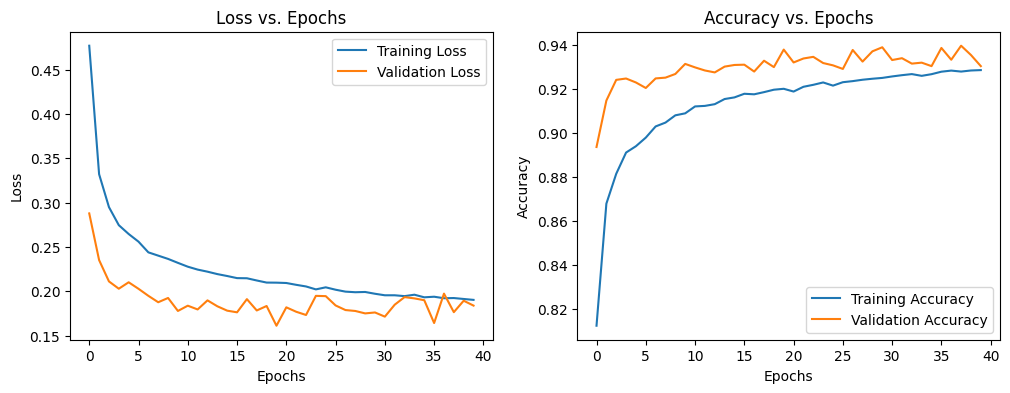

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(15,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Entrenamiento caracteristicas mutual Information 1.5M (94.62%)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               2048      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10499 (41.01 KB)
Trainable params: 10499

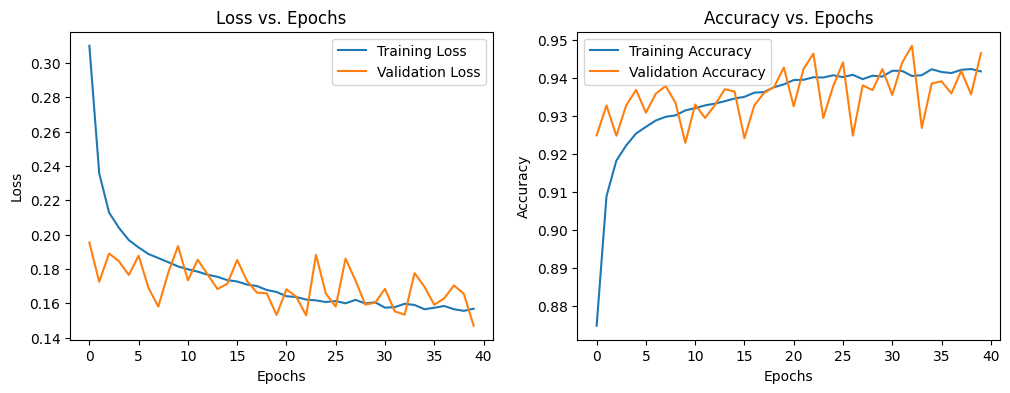

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(15,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Entrenamiento con todas las caracteristicas 15K (96.29%)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 41)                0         
                                                                 
 dense (Dense)               (None, 128)               5376      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (

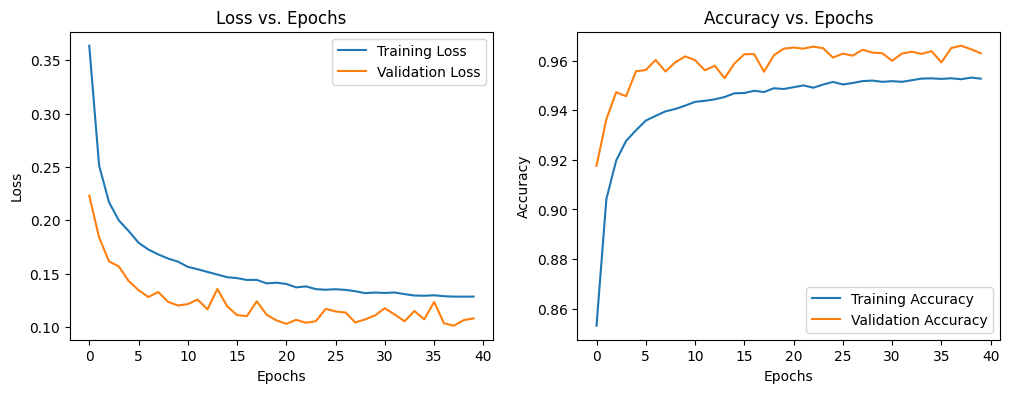

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(41,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Entrenamiento con todas las caracteristicas 1.5M (96.09%)

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape

(1063489, 41)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 41)                0         
                                                                 
 dense (Dense)               (None, 128)               5376      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (

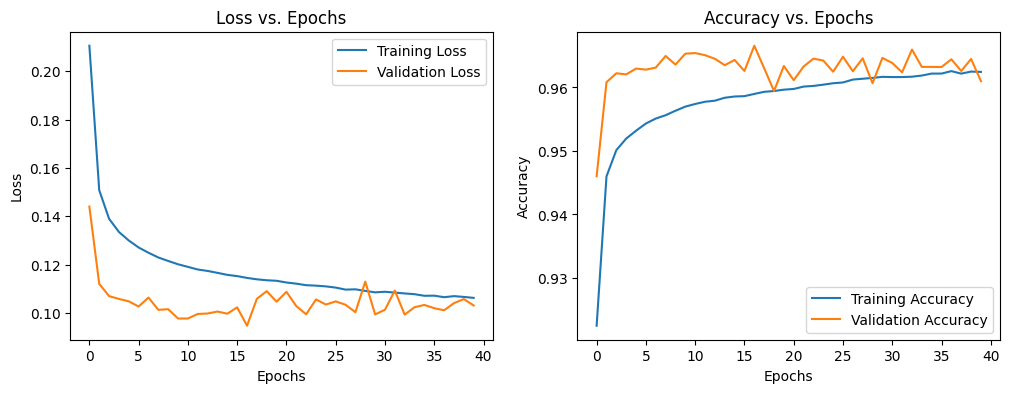

In [6]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(41,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Entrenamiento con todas las caracteristicas 1.5M Codificacion one hot (96.40%)


In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, utils
import matplotlib.pyplot as plt

y = df_1MOH[['DDoS', 'No_DDoS', 'Benign']]

NIDS_features =['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 
                'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 
                'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 
                'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 
                'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 
                'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
                'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE',
                'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE']

X = df_1MOH[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# Convertimos las características escaladas nuevamente a un dataframe
X = pd.DataFrame(X_sc, columns=NIDS_features)

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir X_train en entrenamiento (75%) y validación (25%) para obtener un total de 60%-20%-20% split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)




In [32]:
#y_train.shape
#y_val.shape
#y_test.shape
print(y_train)

          DDoS  No_DDoS  Benign
550706    True    False   False
1500305  False     True   False
15482    False    False    True
128458   False    False    True
135192   False    False    True
...        ...      ...     ...
1313259  False     True   False
656817    True    False   False
284452   False    False    True
88032    False    False    True
670788    True    False   False

[911562 rows x 3 columns]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 41)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               5376      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827

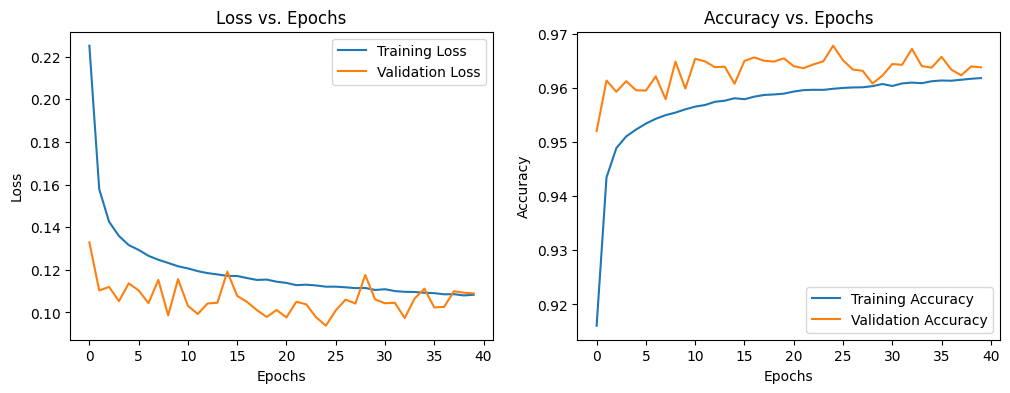

In [33]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(41,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"AccuracyPrueba: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Entrenamiento con caracteristicas RFE 1.5M Codificacion ordinal (96.14%)¶

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape

(1063489, 20)

In [ ]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(20,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11139 (43.51 KB)
Trainable params: 11139 (

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

7122/7122 [==============================] - 8s 1ms/step


### entrenamiento sin ataques NO_DDoS 40 epoch (98.78%) Features RFE

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape

(711220, 20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11139 (43.51 KB)
Trainable params: 11139 (

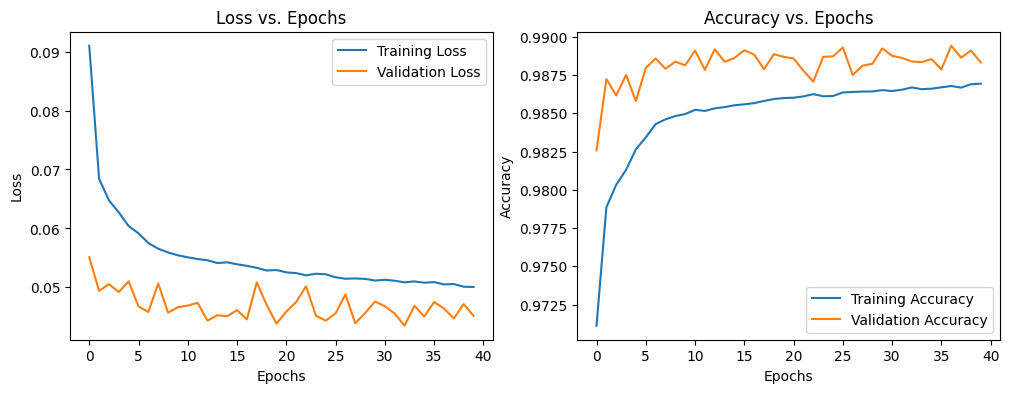

In [10]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(20,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11139 (43.51 KB)
Trainable params: 11139 (

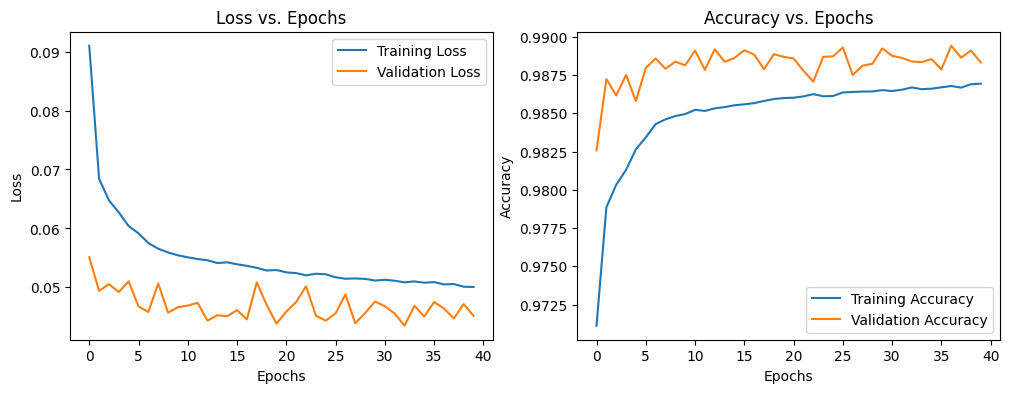

In [10]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(20,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Entrenamiento con 100 epocas 98,91% features RFE

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               2688      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11139 (43.51 KB)
Trainable params: 11139

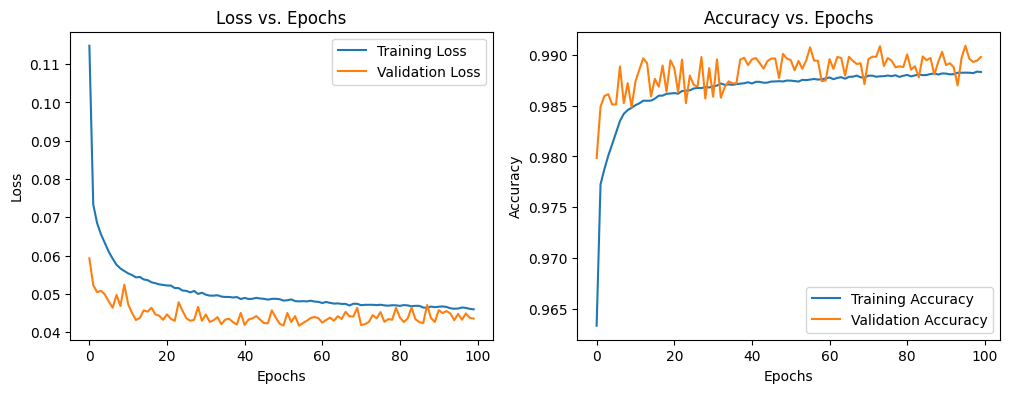

In [11]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(20,)),    
    layers.Dropout(rate=0.1),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=240)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### entrenamiento con capa batchnormalization 99.18% todas las caracteristicas



In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape




(1063489, 41)

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Suponiendo que tienes X e y ya definidos y con datos apropiados.
# X, y = load_your_data_function()  # Reemplaza con tu función de carga de datos

# División de los datos en conjuntos de entrenamiento y temporal (validación + prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# División del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Función para calcular los conteos y porcentajes
def calculate_counts_percentages(y_data):
    unique, counts = np.unique(y_data, return_counts=True)
    percentages = (counts / len(y_data)) * 100
    return dict(zip(unique, zip(counts, percentages)))

# Calcula conteos y porcentajes para cada conjunto de datos
train_counts_percentages = calculate_counts_percentages(y_train)
val_counts_percentages = calculate_counts_percentages(y_val)
test_counts_percentages = calculate_counts_percentages(y_test)

# Crea una tabla con la información
table_data = []
for attack_type in sorted(set(y_train)):
    row = [
        attack_type,
        train_counts_percentages.get(attack_type, (0, 0.0))[0],
        train_counts_percentages.get(attack_type, (0, 0.0))[1],
        val_counts_percentages.get(attack_type, (0, 0.0))[0],
        val_counts_percentages.get(attack_type, (0, 0.0))[1],
        test_counts_percentages.get(attack_type, (0, 0.0))[0],
        test_counts_percentages.get(attack_type, (0, 0.0))[1],
    ]
    table_data.append(row)

# Convertir en DataFrame de pandas para una mejor visualización
df = pd.DataFrame(table_data, columns=['Attack', 'Training Count', 'Training %', 'Validation Count', 'Validation %', 'Test Count', 'Test %'])

# Ajustes finales para la visualización
df.set_index('Attack', inplace=True)
df


,Training Count,Training %,Validation Count,Validation %,Test Count,Test %
Attack,,,,,,
0,304120,42.760327,65169,42.760689,65169,42.760408
1,407100,57.239673,87235,57.239311,87236,57.239592


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 41)                0         
                                                                 
 batch_normalization_6 (Bat  (None, 41)                164       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 128)               5376      
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)               

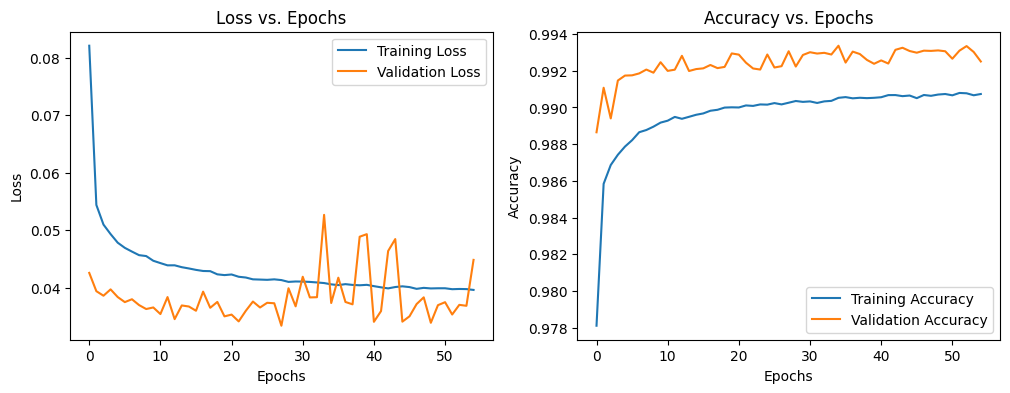

In [17]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(41,)),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(), 
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=55, batch_size=240)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### entrenamiento con capa batchnormalization 98,77% caracteristicas RFE  sample_1M_DDoS


In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape


(5317477, 20)

In [28]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(20,)),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(), 
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=240)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 batch_normalization_9 (Bat  (None, 20)                80        
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 128)               2688      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            (None, 64)               

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\runpy.py", line 86, in _run_code

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\johan\AppData\Local\Temp\ipykernel_11144\2457686393.py", line 37, in <module>

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\johan\anaconda3\envs\Deeplearning1\lib\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

Received a label value of 20 which is outside the valid range of [0, 3).  Label values: 20 5 2 5 17 2 5 2 2 5 2 6 2 5 5 5 5 2 6 2 20 5 2 6 2 5 6 6 19 5 5 6 6 19 6 2 5 5 20 6 6 2 2 19 2 2 6 5 5 2 5 2 6 5 17 2 6 5 2 5 5 5 5 6 5 19 15 6 6 19 2 2 2 2 6 2 5 6 6 20 5 2 11 6 2 6 11 5 11 6 2 5 6 3 5 11 5 2 5 6 2 2 5 5 5 6 5 5 5 17 6 6 5 2 2 2 2 5 6 2 2 19 2 2 6 2 19 5 2 5 2 2 8 2 2 2 2 2 5 5 6 6 2 2 2 2 2 6 2 5 6 2 11 2 20 2 6 5 5 2 6 6 2 15 17 6 2 2 2 5 19 2 2 2 6 2 2 5 5 15 2 5 6 2 6 5 2 5 19 2 5 19 5 2 5 5 6 2 2 19 5 2 5 3 2 5 6 5 6 2 6 6 2 6 20 5 19 2 6 2 5 19 2 6 20 2 6 19 2 2 19 2 17 2 5 6 2 5 2 19
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_576495]

### Predicciones

In [5]:
# Obtener las predicciones del modelo para el conjunto de prueba
y_pred_prob = model.predict(X_test)  #  probabilidades de cada clase para cada muestra
y_pred = np.argmax(y_pred_prob, axis=1)  # seleccionar la clase con la probabilidad más alta para cada muestra


# Convirtiendo y_test a un arreglo de NumPy
y_test_array = y_test.values

# Ahora, para imprimir algunas de las predicciones y valores reales:

num_samples_to_print = 10  # o cualquier otro número que desees

print("Predicciones vs Valores Reales\n")
for i in range(num_samples_to_print):
#for i in range(len(y_test)):
    print(f"Predicción: {y_pred[i]} - Real: {y_test_array[i]}")
    

# para imprimir todas las predicciones y valores reales,  elimina la línea 'num_samples_to_print' 
# y cambia el bucle for a: for i in range(len(y_test)):



713/713 [==============================] - 1s 658us/step
Predicciones vs Valores Reales

Predicción: 1 - Real: 1
Predicción: 0 - Real: 0
Predicción: 2 - Real: 2
Predicción: 2 - Real: 2
Predicción: 1 - Real: 1
Predicción: 2 - Real: 2
Predicción: 0 - Real: 0
Predicción: 1 - Real: 1
Predicción: 1 - Real: 1
Predicción: 0 - Real: 0


### Estrategias de mejora

Un valor de exactitud (accuracy) de 57.46% indica que el modelo tiene un margen significativo de mejora. Aquí hay algunas estrategias que podrías considerar para mejorar el rendimiento de tu modelo:

**Datos**:

**Más datos**: Si es posible, trata de conseguir más datos. Modelos como las redes neuronales pueden beneficiarse de grandes cantidades de datos.
Limpieza de datos: Asegúrate de que tus datos estén limpios y no contengan valores atípicos, valores faltantes o errores.
Ingeniería de características: Genera nuevas características que puedan ser relevantes para la tarea o transforma las existentes para mejorar su utilidad.
Balance de clases: Si una clase es dominante en tu conjunto de datos, esto podría sesgar los resultados. Considera técnicas como el oversampling, undersampling o la generación de datos sintéticos (por ejemplo, usando SMOTE).
Arquitectura del modelo:

**Más capas/neuronas**: Agrega más capas o neuronas a las capas existentes. Pero ten cuidado de no sobreajustar.
Regularización: Usa técnicas de regularización como dropout o regularización L1/L2 para evitar el sobreajuste.
Funciones de activación: Experimenta con diferentes funciones de activación (e.g., ReLU, Leaky ReLU, tanh).
Entrenamiento:

**Tasa de aprendizaje**: Ajusta la tasa de aprendizaje. Podrías considerar técnicas como la tasa de aprendizaje adaptativa.
Optimizadores: Cambia el optimizador. Adam es una opción popular, pero podrías experimentar con otros como RMSprop o SGD con momentum.
Batch size: Ajusta el tamaño del lote. Un tamaño diferente puede influir en la convergencia y la velocidad del entrenamiento.
Más épocas: Entrena durante más épocas, pero nuevamente, ten cuidado de no sobreajustar. Usa un conjunto de validación para monitorizar y detén el entrenamiento si el rendimiento en el conjunto de validación comienza a deteriorarse (esto se llama "early stopping").
Otras técnicas:

**Normalización**: Si no lo has hecho, normaliza tus datos (e.g., usando MinMaxScaler o StandardScaler).
Aumento de datos: Si es aplicable (por ejemplo, en problemas de imágenes), puedes usar técnicas de aumento de datos para generar variantes de tus datos de entrenamiento y así reducir el sobreajuste.
Modelos en conjunto: Combina las predicciones de múltiples modelos. Técnicas como el bagging o boosting pueden mejorar el rendimiento.
Revisar el problema:

**Replantea el problema**: A veces, reformular el problema o usar un enfoque diferente puede ser beneficioso. Por ejemplo, en lugar de una clasificación multiclase, podrías considerar múltiples problemas de clasificación binaria.
Conocimiento del dominio: Integra el conocimiento del dominio en la selección de características, ingeniería de características o incluso en la arquitectura del modelo.

**Otros modelos**:

**Modelos diferentes**: Aunque las redes neuronales son poderosas, no siempre son la mejor herramienta para el trabajo. Considera probar otros modelos como máquinas de soporte vectorial, árboles de decisión, ensamblados como RandomForest o Gradient Boosting, entre otros.
Finalmente, siempre es útil experimentar. El aprendizaje automático a menudo implica mucho ensayo y error para encontrar el mejor modelo o la mejor combinación de técnicas.

### hiperparametros Separados


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, utils

# Definición de hiperparámetros
input_features = 20  # Número de características de entrada
dropout_rate = 0.1  # Tasa de dropout
neurons_layer1 = 128  # Número de neuronas en la primera capa densa
neurons_layer2 = 64  # Número de neuronas en la segunda capa densa
output_classes = 3  # Número de clases de salida
epochs = 25  # Número de épocas para el entrenamiento
batch_size = 240  # Tamaño del lote para el entrenamiento

# Construcción del modelo
model = keras.Sequential([
    layers.InputLayer(input_shape=(input_features,)),    
    layers.Dropout(rate=dropout_rate),
    layers.BatchNormalization(),
    layers.Dense(neurons_layer1, activation='relu'),    
    layers.Dropout(rate=dropout_rate),
    layers.BatchNormalization(),
    layers.Dense(neurons_layer2, activation='relu'),
    layers.Dropout(rate=dropout_rate),
    layers.BatchNormalization(), 
    layers.Dense(output_classes, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Visualización del modelo (necesitarás tener instalado el paquete 'pydot' y 'graphviz')
# utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)


### entrenamiento con capa batchnormalization 93,77% caracteristicas RFE  sample_7M_ordinal_todos los ataques


In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape

(5317477, 20)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 20)                0         
                                                                 
 batch_normalization_12 (Ba  (None, 20)                80        
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 128)               2688      
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_13 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_13 (Dense)            (None, 64)               

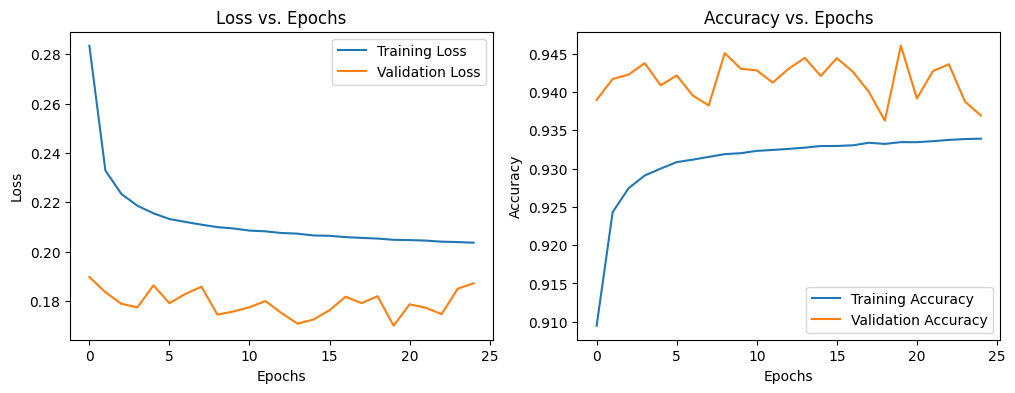

In [30]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(20,)),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(), 
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(21, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=240)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Accuracy: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Entrenamiento con batchnormalization caracteristicas RF SAMPLE_3M_ordinal 94.45% en conjunto de prueba
### Entrenamiento con batchnormalization todas las caracteristicas SAMPLE_3M_ordinal 9% en conjunto de prueba

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Suponiendo que `X`  características y `y` etiquetas (tipos de ataques)
# division datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Division del conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape

(2658771, 41)

In [ ]:
# Definición del modelo
model = keras.Sequential([
    # Capa de entrada: aquí, por ejemplo,  hay 12 características en el dataset.
    # Se Ajusta el 'input_shape' según el número real de características
    layers.InputLayer(input_shape=(41,)),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu'),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(), 
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(21, activation='softmax')
])

# Compilación del modelo
# Utilizamos 'parse_categorical_crossentropy' para problemas multiclase. 
# Si etiquetas están en formato one-hot,se usa 'categorical_crossentropy'. Si están en formato de enteros (0, 1, 2), usa 'sparse_categorical_crossentropy'.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=240)

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"AccuracyTest: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 41)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 41)                164       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               5376      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 64)               

### entrenamiento RFE codificado SAMPLE_3M_COD dataset Balanceado 99.36%

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# `X` son las características y `y` las clases (tipos de ataques)
# Se dividen los datos en entrenamiento (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Se divide el conjunto temporal en validación y prueba (ambos 15% del total original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape

NameError: name 'X' is not defined

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2688      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11139 (43.51 KB)
Trainable params: 11139 (43.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install p

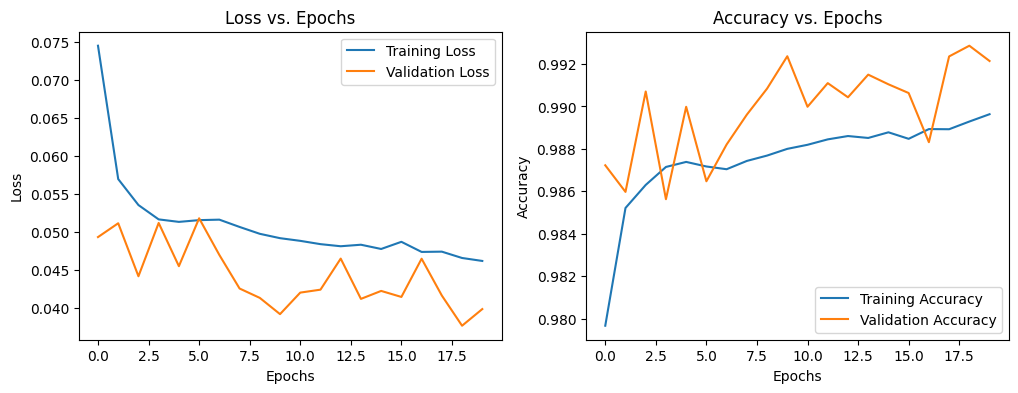

In [10]:
# Definición del modelo
model = keras.Sequential([
        
    # Una capa oculta densa con 128 neuronas y función de activación ReLU
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dropout(rate=0.1), 
    
    # Otra capa oculta densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.1), 
    
    # Capa de salida para 3 clases, con función de activación softmax segun la columna de salida que es multiclase(3 clases DDoS, Benign, No-DDoS)
    layers.Dense(3, activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.0001)
# Compilación del modelo. 'sparse_categorical_crossentropy'.
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para visualizar la arquitectura
model.summary()

# Visualizar el modelo en forma de gráfico
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20,batch_size=128)
# Se puede ajustar las épocas y el batch_size según las necesidades
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=150) 98.95%
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=128)98.84% perdida validacion muy variable 
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=256) #98.97 Unrepresentative Train Dataset
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=128)#99.00 not show noisy movements but is unrepresentative sin batchnormalization

# Evaluación del modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"AccuracyTest: {accuracy*100:.2f}%")

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()